# 11月13日の個人課題
1922076  
南 昂汰  
G2

In [1]:
!pip install pymc3==3.8

     |████████████████████████████████| 911kB 5.9MB/s 
     |████████████████████████████████| 1.5MB 45.5MB/s 
     |████████████████████████████████| 4.3MB 44.1MB/s 
     |████████████████████████████████| 727kB 39.4MB/s 
     |████████████████████████████████| 296kB 42.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [2]:
import numpy as np
import pymc3 as pm

In [3]:
grades = np.loadtxt('grades.csv')

In [4]:
# pymc3によるモデル化
with pm.Model() as model:
  # Prior
  theta=pm.Uniform('theta', lower=0, upper=1)

  # Observed
  y=pm.Binomial('y', n=10, p=theta, observed=grades)

In [5]:
# MCMCの実行
with model:
    trace = pm.sample(10000, step=pm.Metropolis(), cores=4)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:14<00:00, 2855.70draws/s]
The number of effective samples is smaller than 25% for some parameters.


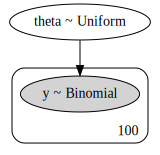

In [6]:
# モデルのグラフィカル表示
pm.model_to_graphviz(model)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe5ab7da20>,
      dtype=object)

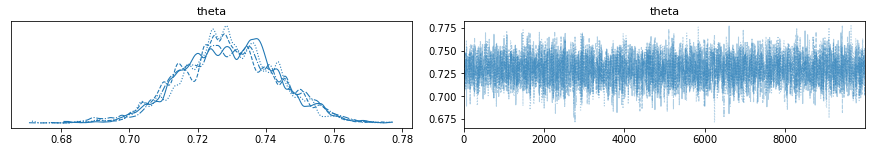

In [7]:
# 収束チェック
pm.traceplot(trace)

In [8]:
# 結果の出力
pm.summary(trace)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.729,0.014,0.703,0.755,0.0,0.0,4371.0,4370.0,4374.0,3947.0,1.0


/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


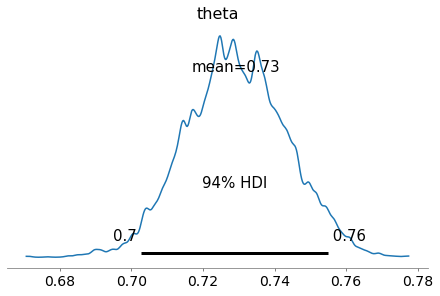

In [9]:
# 事後分布の表示
pm.plot_posterior(trace)